# CUSTOMER CHURN ANALYSIS

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Churn analysis dataset
tele=pd.read_csv("Telecom_customer_churn.csv")
tele

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
tele.shape

(7043, 21)

In [4]:
tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
tele.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
tele['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
#checking if spaces are present in the column
tele.loc[tele["TotalCharges"]== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#Filling spaces with NaN value
tele["TotalCharges"]=tele["TotalCharges"].replace(" ",np.nan)

In [9]:
tele.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#converting from object type to float
tele["TotalCharges"]=tele["TotalCharges"].astype(float)

In [11]:
#Filling NaN values
tele["TotalCharges"]=tele["TotalCharges"].fillna(np.mean(tele["TotalCharges"]))

In [12]:
tele.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
tele.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA:

Male      3555
Female    3488
Name: gender, dtype: int64


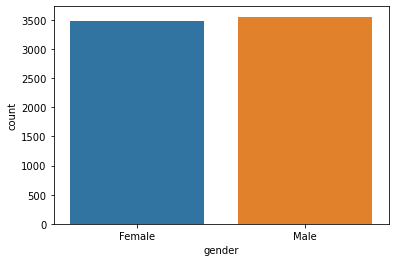

In [15]:
sns.countplot(tele['gender'])
print(tele["gender"].value_counts())

From the above observations, total number of male are 3555 and female are 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


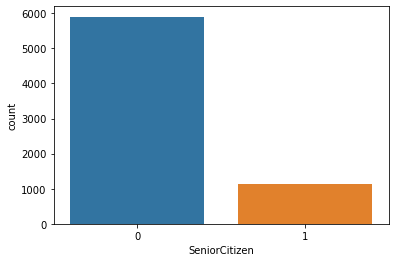

In [16]:
sns.countplot(tele['SeniorCitizen'])
print(tele["SeniorCitizen"].value_counts())

From the above observation, the total number of younger customer is 5901 and senior citizen is 1142

No     3641
Yes    3402
Name: Partner, dtype: int64


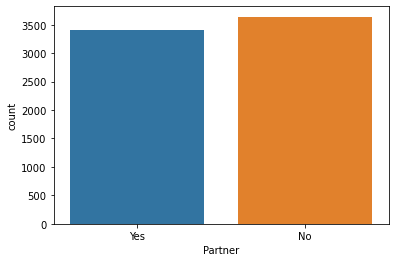

In [17]:
sns.countplot(tele['Partner'])
print(tele["Partner"].value_counts())

From the above observation,total number of customers having partner is 3402 and no partner is 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64


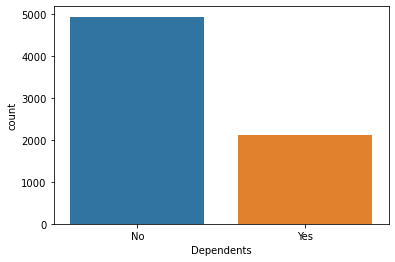

In [18]:
sns.countplot(tele['Dependents'])
print(tele["Dependents"].value_counts())

From the above observation, the total number of dependent customer is 2110 and independent customer is 4933

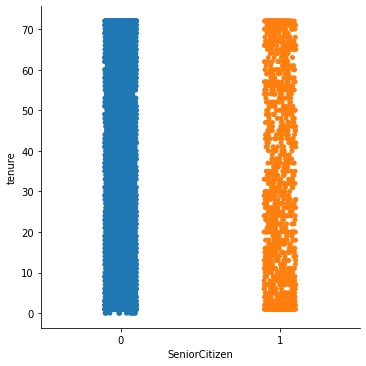

In [19]:
sns.catplot(x='SeniorCitizen',y='tenure',data=tele)

Yes    6361
No      682
Name: PhoneService, dtype: int64


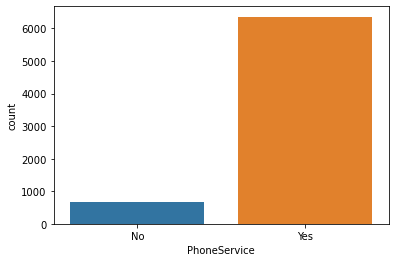

In [20]:
sns.countplot(tele['PhoneService'])
print(tele["PhoneService"].value_counts())

From the above observation, total  number of customer using phone service is 6361 and not using phone service is 682

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


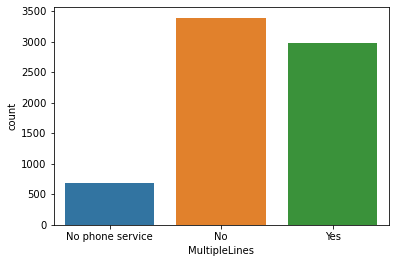

In [21]:
sns.countplot(tele['MultipleLines'])
print(tele["MultipleLines"].value_counts())

From the above observation, total number of customers using multiple services is 2971, not using multiple services is 3390 and no any phone services is 682

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


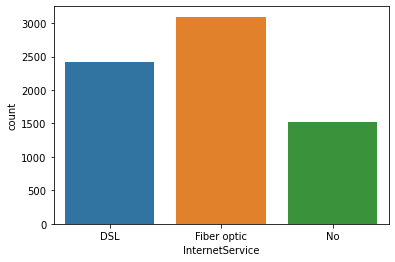

In [22]:
sns.countplot(tele['InternetService'])
print(tele["InternetService"].value_counts())

Total number of customers using fibre optic is 3096, DSL is 2421 and not using internet service is 1526

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


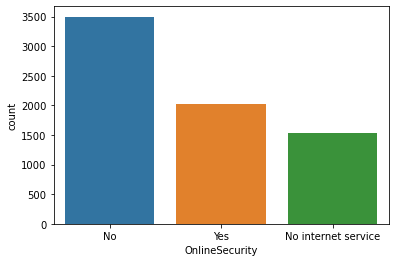

In [23]:
sns.countplot(tele['OnlineSecurity'])
print(tele["OnlineSecurity"].value_counts())

Total number of customers not using internet service is 1526, having online security is 2019 and no online security is 3498

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


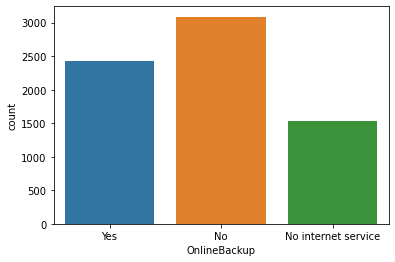

In [24]:
sns.countplot(tele['OnlineBackup'])
print(tele["OnlineBackup"].value_counts())

Total number of customers having no internet service is 1526, having online backup is 2429 and no online backup is 3088

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


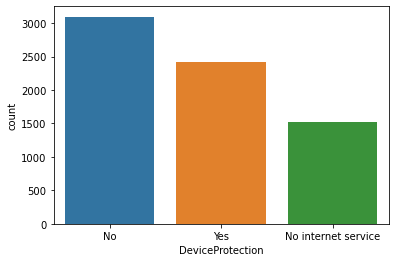

In [25]:
sns.countplot(tele['DeviceProtection'])
print(tele["DeviceProtection"].value_counts())

Total number of customers having no internet service is 1526,having device protection is 2422 and no device protection is 3095

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


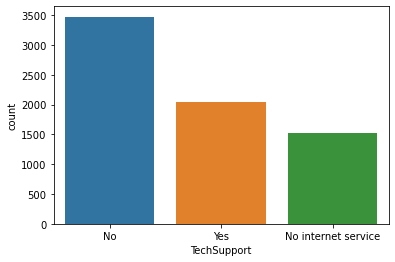

In [26]:
sns.countplot(tele['TechSupport'])
print(tele["TechSupport"].value_counts())

Total number of customers having no internet service is 1526,having tech support is 2044 and having no tech support is 3473

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


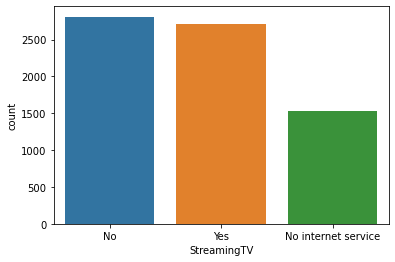

In [27]:
sns.countplot(tele['StreamingTV'])
print(tele["StreamingTV"].value_counts())

Total number of customers not having internet service is 1526, using streamingTV is 2707 and not using streamingTV is 2810.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


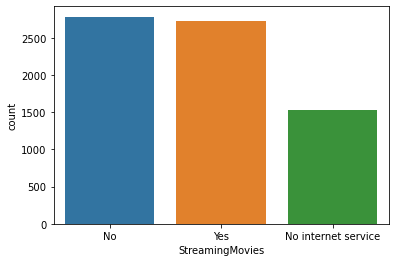

In [28]:
sns.countplot(tele['StreamingMovies'])
print(tele["StreamingMovies"].value_counts())

Total number of customers not aving internet service is 1526, using streaming movies is 2732 and not using streaming movies is 2785

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


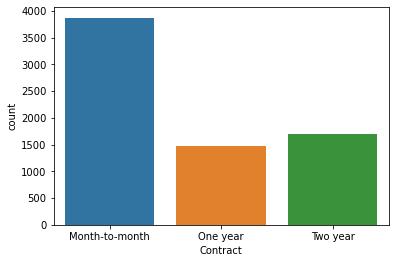

In [29]:
sns.countplot(tele['Contract'])
print(tele["Contract"].value_counts())

Total number of customers having month to month contract is 3875, one year contract is 1473 and two years contract is 1695

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


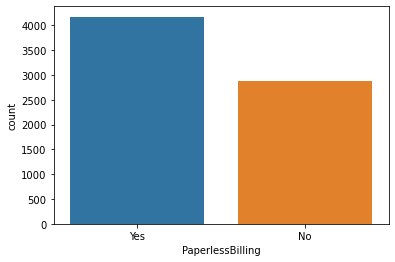

In [30]:
sns.countplot(tele['PaperlessBilling'])
print(tele['PaperlessBilling'].value_counts())

Total number of paper billing is 4171 and no paper billing is 2872

No     5174
Yes    1869
Name: Churn, dtype: int64


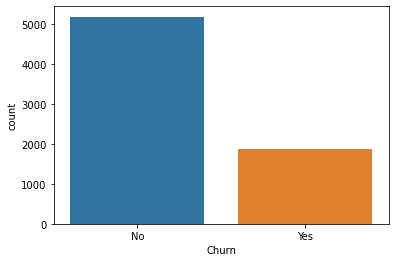

In [31]:
sns.countplot(tele['Churn'])
print(tele["Churn"].value_counts())

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

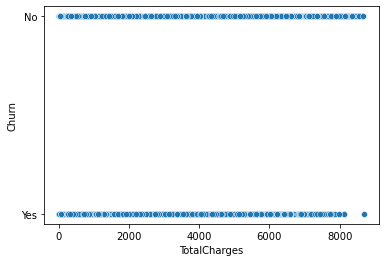

In [32]:
sns.scatterplot(x='TotalCharges',y='Churn',data=tele)

We can see that the columns TotalCharges and Churn are equally distributed.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

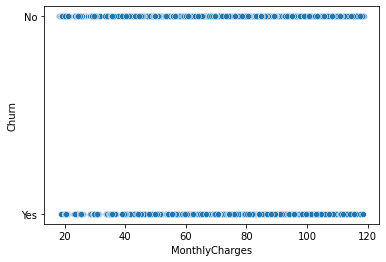

In [33]:
sns.scatterplot(x='MonthlyCharges',y='Churn',data=tele)

We can see that the columns MonthlyCharges and Churn are equally distributed.

# LABEL ENCODING:

In [34]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

tele['customerID']=le.fit_transform(tele['customerID'])
tele['gender']=le.fit_transform(tele['gender'])
tele['Partner']=le.fit_transform(tele['Partner'])
tele['Dependents']=le.fit_transform(tele['Dependents'])
tele['PhoneService']=le.fit_transform(tele['PhoneService'])
tele['MultipleLines']=le.fit_transform(tele['MultipleLines'])
tele['InternetService']=le.fit_transform(tele['InternetService'])
tele['OnlineSecurity']=le.fit_transform(tele['OnlineSecurity'])
tele['OnlineBackup']=le.fit_transform(tele['OnlineBackup'])
tele['DeviceProtection']=le.fit_transform(tele['DeviceProtection'])
tele['TechSupport']=le.fit_transform(tele['TechSupport'])
tele['StreamingTV']=le.fit_transform(tele['StreamingTV'])
tele['StreamingMovies']=le.fit_transform(tele['StreamingMovies'])
tele['Contract']=le.fit_transform(tele['Contract'])
tele['PaperlessBilling']=le.fit_transform(tele['PaperlessBilling'])
tele['PaymentMethod']=le.fit_transform(tele['PaymentMethod'])
tele['Churn']=le.fit_transform(tele['Churn'])

tele

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [35]:
tele.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

# Correlation:

In [36]:
tele.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


Correlation using heatmap:

<AxesSubplot:>

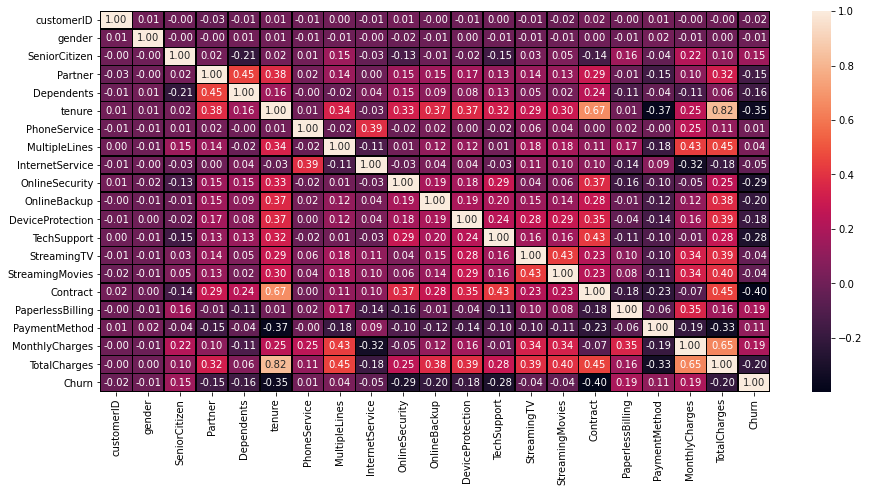

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(tele.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

Outcome of correlation:

column customerID has 2% negative correlation with target column churn.
column gender has 1% negative correlation with target column churn.
column SeniorCitizen has 15% correlation with target column churn.
column Partner has 15% negative correlation with target column churn.
column Dependents has 16% negative correlation with target column churn.
column tenure has 35% negative correlation with target column churn.
column PhoneService has 1% correlation with target column churn.
column MultipleLines has 4% with target column churn.
column InternetService 5% negative correlation with target column churn.
column OnlineSecurity 29% negative correlation with target column churn.
column OnlineBackup has 20% negative correlation with target column churn.
column DeviceProtection has 18% negative correlation with target column churn.
column TechSupport has 28% negative correlation with target column churn.
column StreamingTV has 4% negative correlation with target column churn.
column StreamingMovies has 4% negative correlation with target column churn.
column Contract has 40% negative correlation with target column churn.
column PaperlessBilling has 19% correlation with target column churn.
column PaymentMethod has 11% correlation with target column churn.
column MonthlyCharges has 19% correlation with target column churn.
column TotalCharges has 20% negative correlation with target column churn.

Max.Correlation:contract
    
Min.Correlation:gender,Phoneservice

# Describe of Dataset:

In [38]:
tele.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


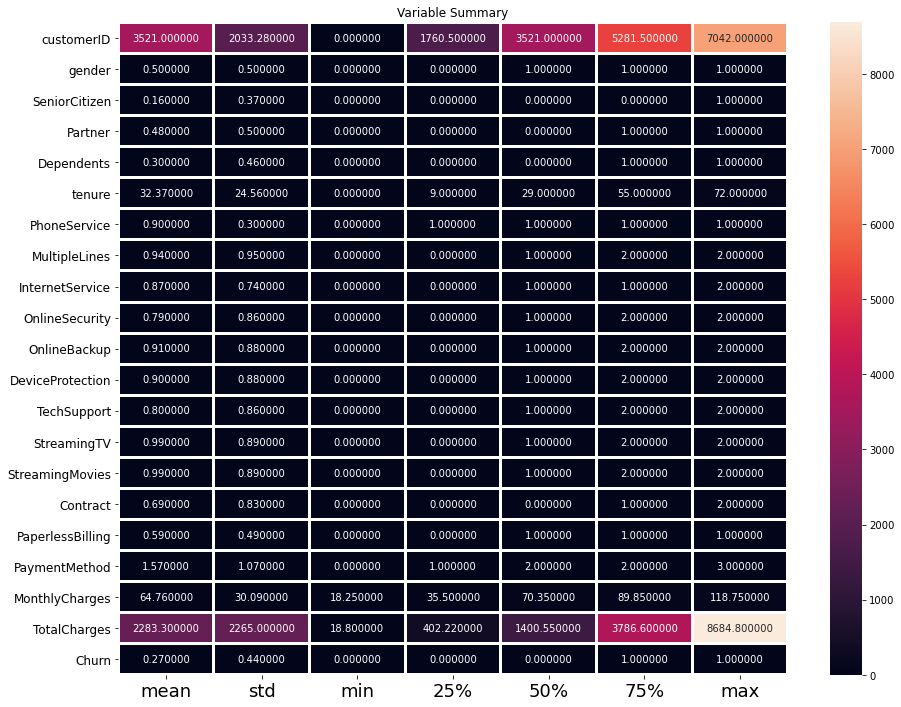

In [39]:
plt.figure(figsize=(15,12))
sns.heatmap(round(tele.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

Outcome Of Desrcribe of Dataset:

In [40]:
tele.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0          

# Outliers Checking:

<AxesSubplot:>

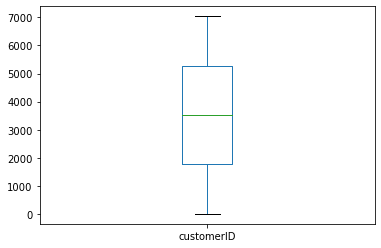

In [41]:
tele['customerID'].plot.box()

<AxesSubplot:>

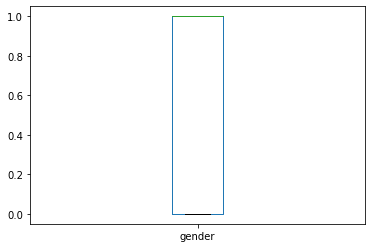

In [42]:
tele['gender'].plot.box()

<AxesSubplot:>

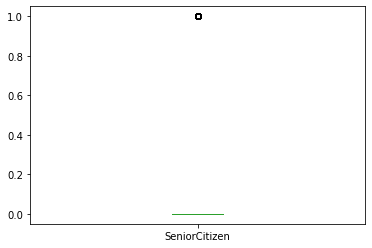

In [43]:
tele['SeniorCitizen'].plot.box()

<AxesSubplot:>

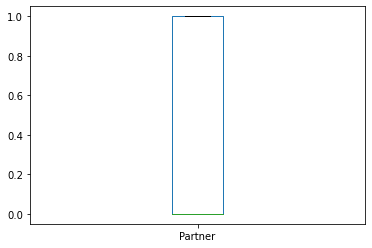

In [44]:
tele['Partner'].plot.box()

<AxesSubplot:>

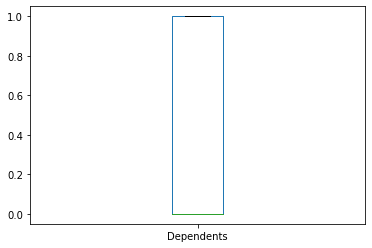

In [45]:
tele['Dependents'].plot.box()

<AxesSubplot:>

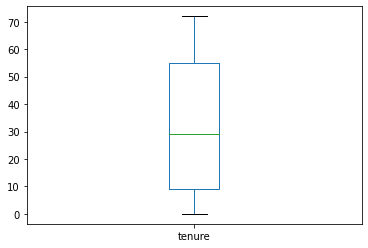

In [46]:
tele['tenure'].plot.box()

<AxesSubplot:>

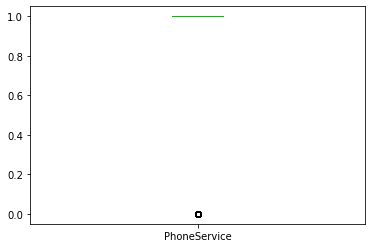

In [47]:
tele['PhoneService'].plot.box()

<AxesSubplot:>

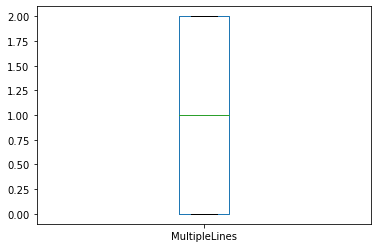

In [48]:
tele['MultipleLines'].plot.box()

<AxesSubplot:>

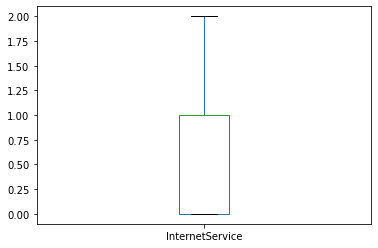

In [49]:
tele['InternetService'].plot.box()

<AxesSubplot:>

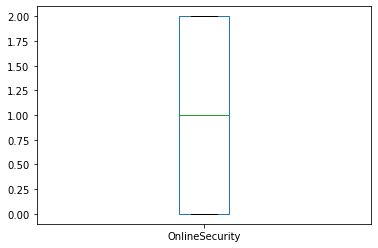

In [50]:
tele['OnlineSecurity'].plot.box()

<AxesSubplot:>

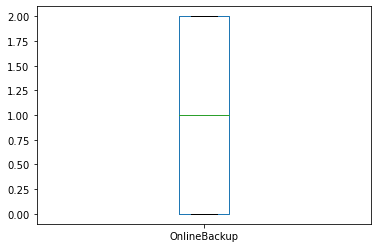

In [51]:
tele['OnlineBackup'].plot.box()

<AxesSubplot:>

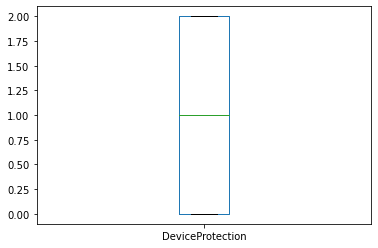

In [52]:
tele['DeviceProtection'].plot.box()

<AxesSubplot:>

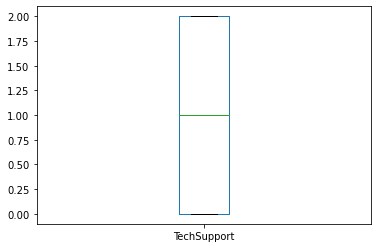

In [53]:
tele['TechSupport'].plot.box()

<AxesSubplot:>

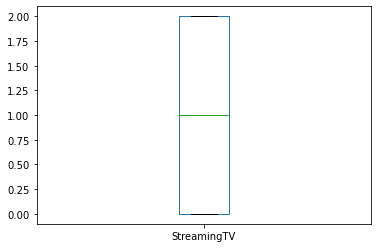

In [54]:
tele['StreamingTV'].plot.box()

<AxesSubplot:>

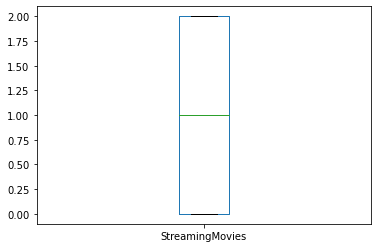

In [55]:
tele['StreamingMovies'].plot.box()

<AxesSubplot:>

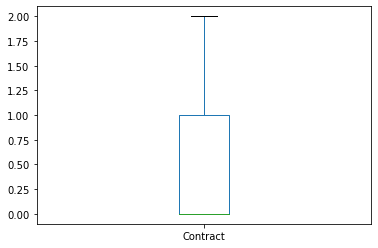

In [56]:
tele['Contract'].plot.box()

<AxesSubplot:>

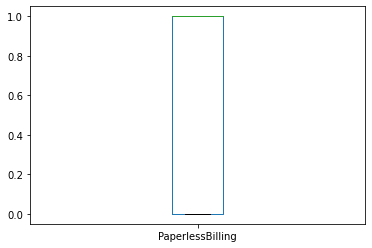

In [57]:
tele['PaperlessBilling'].plot.box()

<AxesSubplot:>

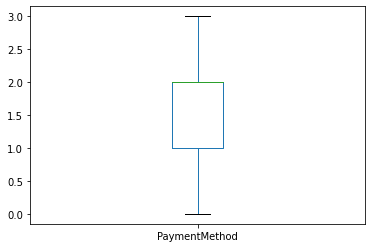

In [58]:
tele['PaymentMethod'].plot.box()

<AxesSubplot:>

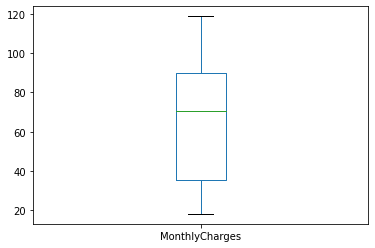

In [59]:
tele['MonthlyCharges'].plot.box()

<AxesSubplot:>

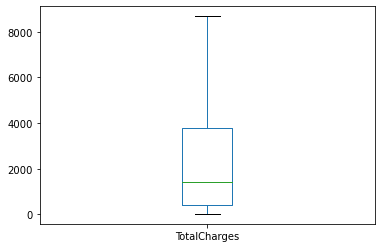

In [60]:
tele['TotalCharges'].plot.box()

<AxesSubplot:>

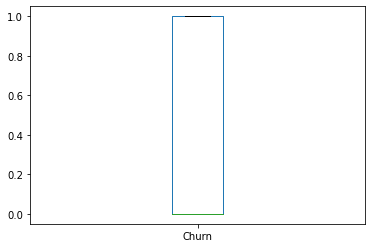

In [61]:
tele['Churn'].plot.box()

From the above outcome we can see that columns[customerID,gender,Partner,Dependents,tenure,MultipleLines,InternetService,onlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn] has no outliers and columns[SeniorCitizen,PhoneService] has less outliers.

# Skewness:

In [62]:
tele.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Outcome of skewness:

# Normal Distribution Curve:

<AxesSubplot:xlabel='customerID', ylabel='Density'>

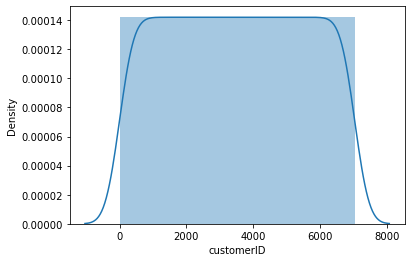

In [63]:
sns.distplot(tele['customerID'])

<AxesSubplot:xlabel='gender', ylabel='Density'>

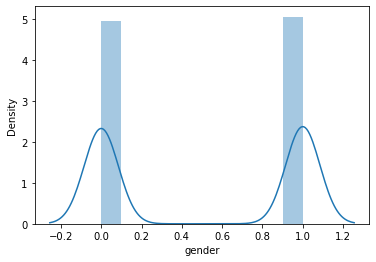

In [64]:
sns.distplot(tele['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

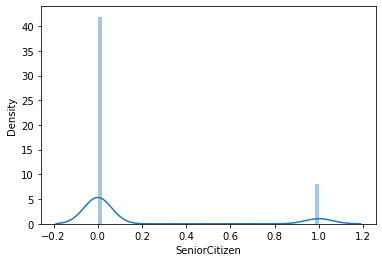

In [65]:
sns.distplot(tele['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='Density'>

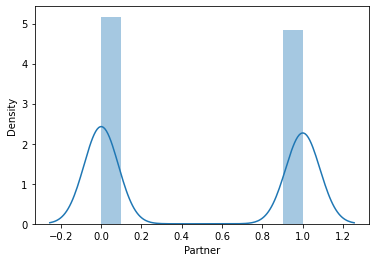

In [66]:
sns.distplot(tele['Partner'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

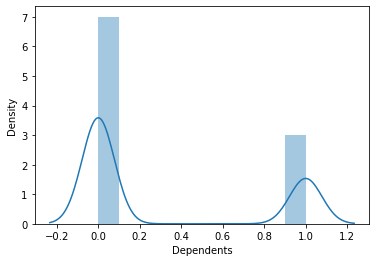

In [67]:
sns.distplot(tele['Dependents'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

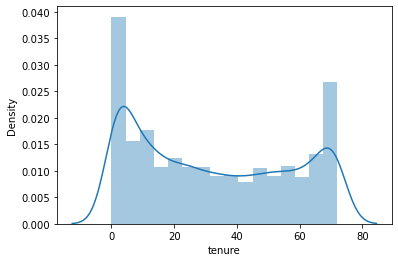

In [68]:
sns.distplot(tele['tenure'])

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

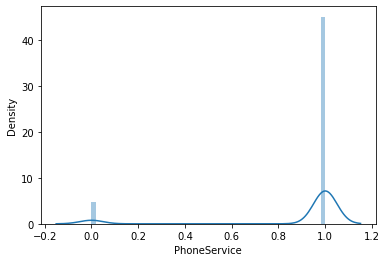

In [69]:
sns.distplot(tele['PhoneService'])

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

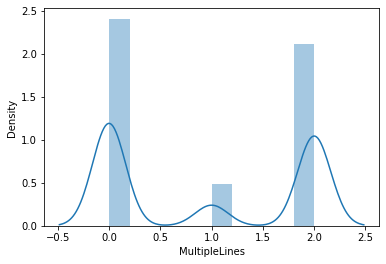

In [70]:
sns.distplot(tele['MultipleLines'])

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

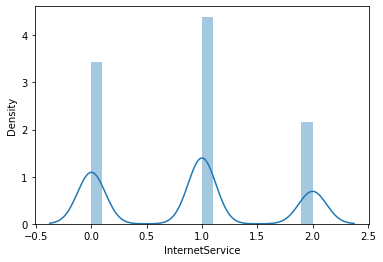

In [71]:
sns.distplot(tele['InternetService'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

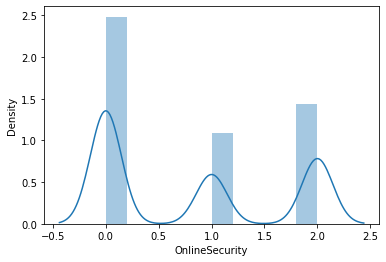

In [72]:
sns.distplot(tele['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

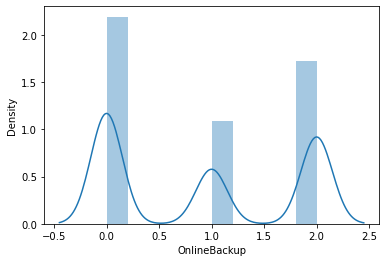

In [73]:
sns.distplot(tele['OnlineBackup'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

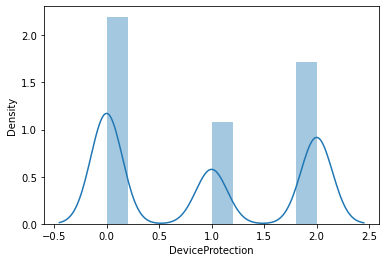

In [74]:
sns.distplot(tele['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

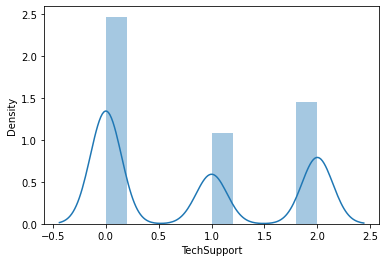

In [75]:
sns.distplot(tele['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

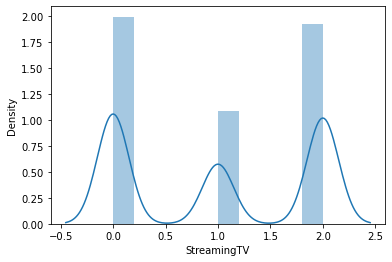

In [76]:
sns.distplot(tele['StreamingTV'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

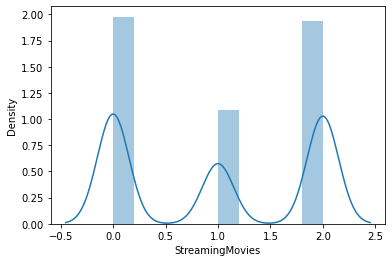

In [77]:
sns.distplot(tele['StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='Density'>

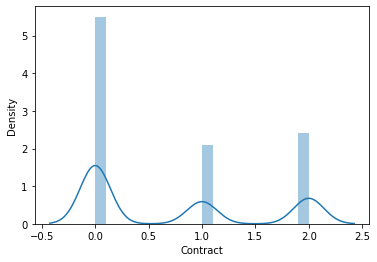

In [78]:
sns.distplot(tele['Contract'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

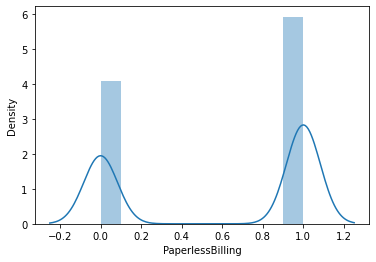

In [79]:
sns.distplot(tele['PaperlessBilling'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='Density'>

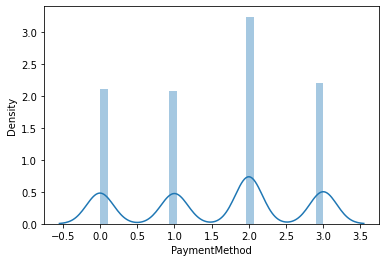

In [80]:
sns.distplot(tele['PaymentMethod'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

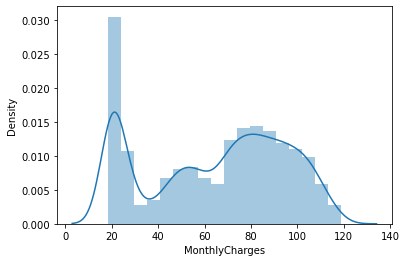

In [81]:
sns.distplot(tele['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

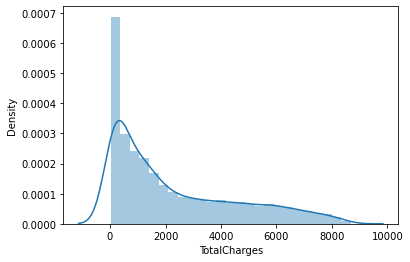

In [82]:
sns.distplot(tele['TotalCharges'])

<AxesSubplot:xlabel='Churn', ylabel='Density'>

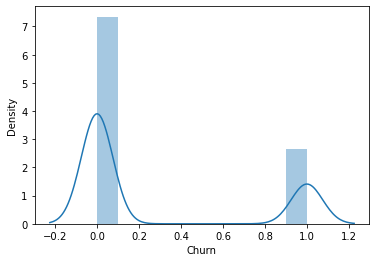

In [83]:
sns.distplot(tele['Churn'])

All the columns of the datset are not distributed equally.The building blocks are outside the normalized curve.

# DataCleaning;

In [84]:
tele=tele.drop(["customerID","gender"],axis=1)

In [85]:
tele

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Removing Outliers:

# z-Score Technique:

In [86]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(tele))
z.shape

(7043, 19)

In [87]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [88]:
tele_new=tele[(z<3).all(axis=1)]
print(tele.shape)
print(tele_new.shape)

(7043, 19)
(6361, 19)


Percentage Data Loss:

In [89]:
percentage_loss=(7043-6361)/7043*100
print(percentage_loss)

9.683373562402386


# IQR Technique:

In [90]:
Q1 = tele.quantile(0.25)
Q3 = tele.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SeniorCitizen          0.000
Partner                1.000
Dependents             1.000
tenure                46.000
PhoneService           0.000
MultipleLines          2.000
InternetService        1.000
OnlineSecurity         2.000
OnlineBackup           2.000
DeviceProtection       2.000
TechSupport            2.000
StreamingTV            2.000
StreamingMovies        2.000
Contract               1.000
PaperlessBilling       1.000
PaymentMethod          1.000
MonthlyCharges        54.350
TotalCharges        3384.375
Churn                  1.000
dtype: float64


In [91]:
tele_new1= tele[~((tele < (Q1 - 1.5 * IQR)) |(tele > (Q3 + 1.5 * IQR))).any(axis=1)]
print(tele_new1.shape)

(5323, 19)


Percentage Data Loss:

In [92]:
percentage_loss=((7043-5323)/7043)*100
print(percentage_loss)

24.42141133039898


The percentage loss in the z-score is less, so we prefer z-score over IQR.

# Dividing dataframe into feature and target:

In [93]:
x=tele_new.iloc[:,:-1]
y=tele_new.iloc[:,-1]

In [94]:
y.value_counts()

0    4662
1    1699
Name: Churn, dtype: int64

In [95]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)

In [96]:
ytrain.value_counts()

0    4662
1    4662
Name: Churn, dtype: int64

# Transforming data to remove skewness:

In [97]:
from sklearn.preprocessing import power_transform
xtrain=power_transform(xtrain,method='yeo-johnson')
xtrain

array([[-0.40016794, -0.7839295 , -0.52539193, ...,  1.4511743 ,
        -0.59936219,  0.36138919],
       [-0.40016794, -0.7839295 , -0.52539193, ...,  1.4511743 ,
        -0.70426663, -1.28574968],
       [-0.40016794, -0.7839295 , -0.52539193, ...,  0.44659046,
        -0.10475389, -1.13907271],
       ...,
       [-0.40016794, -0.7839295 , -0.52539193, ..., -0.55348317,
        -0.09919194, -1.17765487],
       [-0.40016794, -0.7839295 , -0.52539193, ..., -0.55348317,
        -0.78267334, -0.59538976],
       [-0.40016794, -0.7839295 , -0.52539193, ..., -1.5466525 ,
         1.21198834,  1.01432669]])

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtrain

array([[-0.40016794, -0.7839295 , -0.52539193, ...,  1.4511743 ,
        -0.59936219,  0.36138919],
       [-0.40016794, -0.7839295 , -0.52539193, ...,  1.4511743 ,
        -0.70426663, -1.28574968],
       [-0.40016794, -0.7839295 , -0.52539193, ...,  0.44659046,
        -0.10475389, -1.13907271],
       ...,
       [-0.40016794, -0.7839295 , -0.52539193, ..., -0.55348317,
        -0.09919194, -1.17765487],
       [-0.40016794, -0.7839295 , -0.52539193, ..., -0.55348317,
        -0.78267334, -0.59538976],
       [-0.40016794, -0.7839295 , -0.52539193, ..., -1.5466525 ,
         1.21198834,  1.01432669]])

# MODEL BUILDING:

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression:

In [100]:
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=i)
    lg.fit(train_x,train_y)
    pred_train=lg.predict(train_x)
    pred_test=lg.predict(test_x)
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs well")
        print("At random state:",i)
        print("Training Accuracy:",accuracy_score(train_y,pred_train)*100)
        print("Testing Accuracy:",accuracy_score(test_y,pred_test)*100)

At random state 20 The model performs well
At random state: 20
Training Accuracy: 78.33489743933502
Testing Accuracy: 78.28418230563003
At random state 26 The model performs well
At random state: 26
Training Accuracy: 78.29467757071994
Testing Accuracy: 78.28418230563003
At random state 29 The model performs well
At random state: 29
Training Accuracy: 78.40193055369352
Testing Accuracy: 78.39142091152816
At random state 59 The model performs well
At random state: 59
Training Accuracy: 78.26786432497654
Testing Accuracy: 78.28418230563003
At random state 184 The model performs well
At random state: 184
Training Accuracy: 78.38852393082183
Testing Accuracy: 78.44504021447722
At random state 204 The model performs well
At random state: 204
Training Accuracy: 78.33489743933502
Testing Accuracy: 78.28418230563003
At random state 215 The model performs well
At random state: 215
Training Accuracy: 78.33489743933502
Testing Accuracy: 78.33780160857908
At random state 241 The model performs wel

In [101]:
train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=329)
print("Classification Report:",classification_report(test_y,pred_test))
print("Confusion Matrix:",confusion_matrix(test_y,pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.47      0.45      0.46       933
           1       0.48      0.49      0.48       932

    accuracy                           0.47      1865
   macro avg       0.47      0.47      0.47      1865
weighted avg       0.47      0.47      0.47      1865

Confusion Matrix: [[424 509]
 [471 461]]


Cross validation score for Logistic Regression:

In [102]:
from sklearn.model_selection import cross_val_score

lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred_lg = lg.predict(test_x)

lss = accuracy_score(test_y,pred_lg)
for j in range(2,10):
    lsscore = cross_val_score(lg,xtrain,ytrain,cv=j)
    ls_cv = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",ls_cv*100 )
    print("Accuracy score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 76.55512655512655
Accuracy score is :- 78.44504021447722


At cv:- 3
Cross validation score is:- 77.1986271986272
Accuracy score is :- 78.44504021447722


At cv:- 4
Cross validation score is:- 77.54182754182754
Accuracy score is :- 78.44504021447722


At cv:- 5
Cross validation score is:- 77.6172318171881
Accuracy score is :- 78.44504021447722


At cv:- 6
Cross validation score is:- 77.70270270270271
Accuracy score is :- 78.44504021447722


At cv:- 7
Cross validation score is:- 77.79922779922781
Accuracy score is :- 78.44504021447722


At cv:- 8
Cross validation score is:- 77.83196467877414
Accuracy score is :- 78.44504021447722


At cv:- 9
Cross validation score is:- 77.93865293865294
Accuracy score is :- 78.44504021447722




In [103]:
print("At cv:",9)
print("Cross validation score is:",77.93865293865294)
print("Accuracy score is :",78.44504021447722)

At cv: 9
Cross validation score is: 77.93865293865294
Accuracy score is : 78.44504021447722


The value of cv taken is 9.

# Approaching more classifiers:

In [104]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1.Decision Tree Classifier:

In [105]:
parameters = {'criterion':['gini', 'entropy'],'splitter':['best','random']}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}


In [108]:
dtc = DecisionTreeClassifier(criterion='entropy', splitter='best')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
pred_dtc = dtc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_dtc)*100)
print("Classification report:",classification_report(test_y,pred_dtc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_dtc)*100)

dtc_score = cross_val_score(dtc,xtrain,ytrain,cv=9)
dtc_cc = dtc_score.mean() 
print('Cross Val Score:',dtc_cc*100)

Accuracy Score: 78.92761394101878
Classification report:               precision    recall  f1-score   support

           0       0.79      0.80      0.79       933
           1       0.79      0.78      0.79       932

    accuracy                           0.79      1865
   macro avg       0.79      0.79      0.79      1865
weighted avg       0.79      0.79      0.79      1865
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       933
           1       0.79      0.78      0.79       932

    accuracy                           0.79      1865
   macro avg       0.79      0.79      0.79      1865
weighted avg       0.79      0.79      0.79      1865
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       933
           1       0.79      0.78      0.79       932

    accuracy                           0.79      1865
   macro avg       0.79      0.79      0.79      1865
weighted avg       

# 2.KNeighbors Classifier:

In [109]:
parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto'}


In [112]:
knc = KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
pred_knc = knc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_knc)*100)
print("Classification report:",classification_report(test_y,pred_knc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_knc)*100)

knc_score = cross_val_score(knc,xtrain,ytrain,cv=9)
knc_cc = knc_score.mean() 
print('Cross Val Score:',knc_cc*100)

Accuracy Score: 77.85522788203754
Classification report:               precision    recall  f1-score   support

           0       0.83      0.70      0.76       933
           1       0.74      0.86      0.79       932

    accuracy                           0.78      1865
   macro avg       0.79      0.78      0.78      1865
weighted avg       0.79      0.78      0.78      1865
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       933
           1       0.74      0.86      0.79       932

    accuracy                           0.78      1865
   macro avg       0.79      0.78      0.78      1865
weighted avg       0.79      0.78      0.78      1865
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       933
           1       0.74      0.86      0.79       932

    accuracy                           0.78      1865
   macro avg       0.79      0.78      0.78      1865
weighted avg       

# 3.SVC:

In [113]:
svc = SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
pred_svc = svc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_svc)*100)
print("Classification report:",classification_report(test_y,pred_svc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_svc)*100)

svc_score = cross_val_score(svc,xtrain,ytrain,cv=9)
svc_cc = svc_score.mean() 
print('Cross Val Score:',svc_cc*100)

Accuracy Score: 80.58981233243968
Classification report:               precision    recall  f1-score   support

           0       0.83      0.77      0.80       933
           1       0.79      0.84      0.81       932

    accuracy                           0.81      1865
   macro avg       0.81      0.81      0.81      1865
weighted avg       0.81      0.81      0.81      1865
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       933
           1       0.79      0.84      0.81       932

    accuracy                           0.81      1865
   macro avg       0.81      0.81      0.81      1865
weighted avg       0.81      0.81      0.81      1865
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       933
           1       0.79      0.84      0.81       932

    accuracy                           0.81      1865
   macro avg       0.81      0.81      0.81      1865
weighted avg       

# ENSEMBLE METHODS:

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1.Random Forest Classifier:

In [115]:
parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 100}


In [121]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=100)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)
pred_rfc = rfc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_rfc)*100)
print("Classification report:",classification_report(test_y,pred_rfc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_rfc)*100)

rfc_score = cross_val_score(rfc,xtrain,ytrain,cv=9)
rfc_cc = rfc_score.mean() 
print('Cross Val Score:',rfc_cc*100)

Accuracy Score: 84.55764075067023
Classification report:               precision    recall  f1-score   support

           0       0.84      0.85      0.85       933
           1       0.85      0.84      0.84       932

    accuracy                           0.85      1865
   macro avg       0.85      0.85      0.85      1865
weighted avg       0.85      0.85      0.85      1865
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       933
           1       0.85      0.84      0.84       932

    accuracy                           0.85      1865
   macro avg       0.85      0.85      0.85      1865
weighted avg       0.85      0.85      0.85      1865
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       933
           1       0.85      0.84      0.84       932

    accuracy                           0.85      1865
   macro avg       0.85      0.85      0.85      1865
weighted avg       

# 2.Ada Boost Classifier:

In [122]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
abc.fit(train_x,train_y)
abc.score(train_x,train_y)
pred_abc = abc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_abc)*100)
print("Classification report:",classification_report(test_y,pred_abc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_abc)*100)

abc_score = cross_val_score(abc,xtrain,ytrain,cv=9)
abc_cc = abc_score.mean() 
print('Cross Val Score:',abc_cc*100)

Accuracy Score: 80.42895442359249
Classification report:               precision    recall  f1-score   support

           0       0.84      0.75      0.79       933
           1       0.78      0.85      0.81       932

    accuracy                           0.80      1865
   macro avg       0.81      0.80      0.80      1865
weighted avg       0.81      0.80      0.80      1865
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       933
           1       0.78      0.85      0.81       932

    accuracy                           0.80      1865
   macro avg       0.81      0.80      0.80      1865
weighted avg       0.81      0.80      0.80      1865
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       933
           1       0.78      0.85      0.81       932

    accuracy                           0.80      1865
   macro avg       0.81      0.80      0.80      1865
weighted avg       

# 3.Gradient Boosting Classifier:

In [123]:
gbc = GradientBoostingClassifier(criterion='mse', n_estimators=100, learning_rate=0.1, loss='deviance')
gbc.fit(train_x,train_y)
gbc.score(train_x,train_y)
pred_gbc = gbc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_gbc)*100)
print("Classification report:",classification_report(test_y,pred_gbc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_gbc)*100)

gbc_score = cross_val_score(gbc,xtrain,ytrain,cv=9)
gbc_cc = gbc_score.mean() 
print('Cross Val Score:',gbc_cc*100)

Accuracy Score: 82.68096514745308
Classification report:               precision    recall  f1-score   support

           0       0.84      0.80      0.82       933
           1       0.81      0.85      0.83       932

    accuracy                           0.83      1865
   macro avg       0.83      0.83      0.83      1865
weighted avg       0.83      0.83      0.83      1865
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       933
           1       0.81      0.85      0.83       932

    accuracy                           0.83      1865
   macro avg       0.83      0.83      0.83      1865
weighted avg       0.83      0.83      0.83      1865
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       933
           1       0.81      0.85      0.83       932

    accuracy                           0.83      1865
   macro avg       0.83      0.83      0.83      1865
weighted avg       

# 4.Voting Classifier:

In [124]:
from sklearn.ensemble import VotingClassifier

In [125]:
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

In [126]:
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [127]:
#voting classifier with hard voting
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(train_x,train_y)
y_pred=vot_hard.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("Hard Voting Score %d" %score)

[0 0 0 ... 0 1 0]
Hard Voting Score 0


In [128]:
#voting classifier with soft voting
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(train_x,train_y)
y_pred=vot_soft.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("soft Voting Score %d" %score)

[0 0 1 ... 0 1 0]
soft Voting Score 0


# The best model is Random Forest Classifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum.

# AUC ROC Curve:

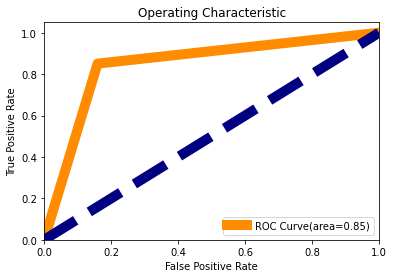

In [129]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_rfc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Saving:

In [131]:
import pickle
filename='customer_churn.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [133]:
import numpy as np
a=np.array(test_y)
predicted=np.array(rfc.predict(test_x))
tele_con=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
tele_con

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
1860,1,1
1861,0,1
1862,0,0
1863,1,1


# From the above table, the model is predicted with 84 percent accuracy.